In [1]:
from PIL import Image
from deepface import DeepFace

2025-01-26 00:43:11.309525: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 00:43:11.313356: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 00:43:11.325339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737826991.345504  212580 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737826991.351255  212580 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-26 00:43:11.372078: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
backend = 'retinaface'

In [3]:
# test with image that contain single face
face_objs = DeepFace.extract_faces(
    img_path = "dataset/train/1725014/1725014-0002.jpg", 
    detector_backend = backend,
    align = True,
    normalize_face=False
)

W0000 00:00:1737826993.251329  212580 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# when there is only one face in the image, the list will contain only one element?
face_objs[0]['facial_area']

{'x': 237,
 'y': 277,
 'w': 128,
 'h': 182,
 'left_eye': (310, 360),
 'right_eye': (257, 345)}

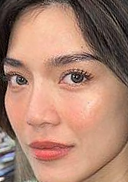

In [5]:
Image.fromarray(face_objs[0]['face'])

In [6]:
# test with image that contain multiple faces
face_objs2 = DeepFace.extract_faces(
    img_path = "dataset/train/14293458/14293458-0026.jpg", 
    detector_backend = backend,
    align = True,
    normalize_face=False
)

In [7]:
# when there are more than one face in the image, the list will contain multiple elements
for face_obj in face_objs2:
    print(face_obj['face'].shape)
    print(face_obj['facial_area'])

(112, 75, 3)
{'x': 113, 'y': 78, 'w': 75, 'h': 112, 'left_eye': (173, 125), 'right_eye': (138, 123)}
(94, 71, 3)
{'x': 346, 'y': 188, 'w': 71, 'h': 94, 'left_eye': (404, 226), 'right_eye': (370, 227)}
(68, 57, 3)
{'x': 206, 'y': 88, 'w': 57, 'h': 68, 'left_eye': (245, 115), 'right_eye': (218, 114)}


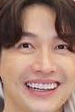

In [8]:
Image.fromarray(face_objs2[0]['face'])

In [9]:
# test with image without visible eyes
face_objs3 = DeepFace.extract_faces(
    img_path = "dataset/train/3083324/3083324-0011.jpg", 
    detector_backend = backend,
    align = True,
    normalize_face=False,
    enforce_detection=False
)

In [10]:
face_objs3[0]['facial_area']

{'x': 0, 'y': 0, 'w': 639, 'h': 639, 'left_eye': None, 'right_eye': None}

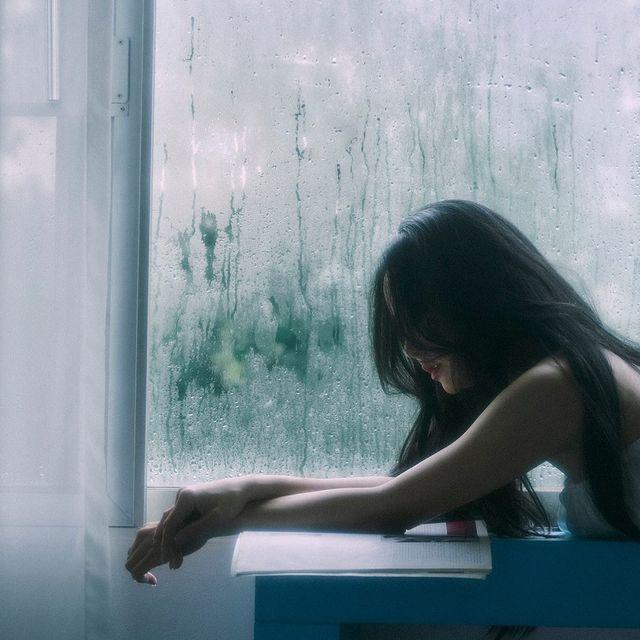

In [11]:
# if no visible eyes, it looks like the face will not be detected
Image.fromarray(face_objs3[0]['face'])

In [12]:
# test with image with sunglasses
face_objs4 = DeepFace.extract_faces(
    img_path = "dataset/train/3083324/3083324-0088.jpg",
    detector_backend = backend,
    align = True,
    normalize_face=False,
    enforce_detection=False
)

In [13]:
face_objs4[0]['facial_area']

{'x': 262,
 'y': 137,
 'w': 56,
 'h': 71,
 'left_eye': (306, 170),
 'right_eye': (280, 165)}

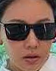

In [14]:
Image.fromarray(face_objs4[0]['face'])

In [15]:
# test with image that have side face with one visible eye
face_objs5 = DeepFace.extract_faces(
    img_path = "dataset/train/3083324/3083324-0081.jpg",
    detector_backend = backend,
    align = True,
    normalize_face=False,
    enforce_detection=False
)

In [16]:
face_objs5[0]['facial_area']

{'x': 276,
 'y': 129,
 'w': 50,
 'h': 72,
 'left_eye': (295, 159),
 'right_eye': (282, 162)}

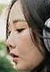

In [17]:
Image.fromarray(face_objs5[0]['face'])

In [18]:
face_objs5[0]['confidence']

np.float64(0.99)